In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# 이진 분류

## 데이터 다운로드

In [ ]:
# 구글 코랩에서 데이터셋 다운로드 및 준비
from google.colab import files
files.upload()  # 'kaggle.json' 파일 업로드

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Orange Diseases 데이터셋 다운로드
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

# 압축 해제
!unzip fruit-and-vegetable-image-recognition.zip -d fruit_vegetable

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:33<00:00, 21.9MB/s]
100% 1.98G/1.98G [01:33<00:00, 22.7MB/s]
Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: fruit_vegetable/test/apple/Image_1.jpg  
  inflating: fruit_vegetable/test/apple/Image_10.jpg  
  inflating: fruit_vegetable/test/apple/Image_2.jpg  
  inflating: fruit_vegetable/test/apple/Image_3.jpg  
  inflating: fruit_vegetable/test/apple/Image_4.jpg  
  inflating: fruit_vegetable/test/apple/Image_5.jpg  
  inflating: fruit_vegetable/test/apple/Image_6.JPG  
  inflating: fruit_vegetable/test/apple/Image_7.jpg  
  inflating: fruit_vegetable/test/apple/Image_8.jpg  
  inflating: fruit_vegetable/test/apple/Image_9.jpg  
  inflating: fruit_vegetable/test/banana/Image_1.jpg  
  inflating: fruit_vegetable/test/banana/Image_10.jpg  
  inflating: fruit_vegetable/test/banana/Image_2.jpg  
  inflating

## 데이터 로드(이진 분류)

In [ ]:
import os
import shutil

# 기존 데이터 경로
base_dir = "fruit_vegetable/train"
test_dir = "fruit_vegetable/test"

In [ ]:
# 새로운 폴더 경로 (fruit/와 vegetable/을 만들 예정)
train_fruit_dir = os.path.join(base_dir, "fruit")
train_vegetable_dir = os.path.join(base_dir, "vegetable")

# 필요한 폴더 생성
os.makedirs(train_fruit_dir, exist_ok=True)
os.makedirs(train_vegetable_dir, exist_ok=True)

# 새로운 폴더 경로 (fruit/와 vegetable/을 만들 예정)
test_fruit_dir = os.path.join(test_dir, "fruit")
test_vegetable_dir = os.path.join(test_dir, "vegetable")

# 필요한 폴더 생성
os.makedirs(test_fruit_dir, exist_ok=True)
os.makedirs(test_vegetable_dir, exist_ok=True)

# 이동할 클래스 리스트 (소문자로 변환)
fruit_classes = [
    "banana", "apple", "pear", "grapes", "orange", "kiwi", "watermelon", "pomegranate",
    "pineapple", "mango"
]

vegetable_classes = [
    "cucumber", "carrot", "capsicum", "onion", "potato", "lemon", "tomato", "raddish",
    "beetroot", "cabbage", "lettuce", "spinach", "soy beans", "cauliflower", "bell pepper",
    "chilli pepper", "turnip", "corn", "sweetcorn", "sweetpotato", "paprika", "jalepeno",
    "ginger", "garlic", "peas", "eggplant"
]

# 폴더 이동 함수
def move_classes_to_new_folders(dir, fruit_dir, vegetable_dir):
    for class_name in os.listdir(dir):
        class_path = os.path.join(dir, class_name)

        # 폴더가 아닌 경우 (파일 등) 무시
        if not os.path.isdir(class_path):
            continue

        class_name_lower = class_name.lower()  # 소문자로 변환 후 비교

        # 과일 클래스라면 fruit 폴더로 이동
        if class_name_lower in fruit_classes:
            new_path = os.path.join(fruit_dir, class_name)
            shutil.move(class_path, new_path)
            print(f"✅ {class_name} → fruit/ 로 이동 완료")

        # 채소 클래스라면 vegetable 폴더로 이동
        elif class_name_lower in vegetable_classes:
            new_path = os.path.join(vegetable_dir, class_name)
            shutil.move(class_path, new_path)
            print(f"✅ {class_name} → vegetable/ 로 이동 완료")

        else:
            print(f"⚠️ {class_name} → 분류되지 않음 (확인 필요)")

# 실행
move_classes_to_new_folders(base_dir, train_fruit_dir, train_vegetable_dir)
move_classes_to_new_folders(test_dir, test_fruit_dir, test_vegetable_dir)

⚠️ fruit → 분류되지 않음 (확인 필요)
⚠️ vegetable → 분류되지 않음 (확인 필요)
⚠️ fruit → 분류되지 않음 (확인 필요)
✅ orange → fruit/ 로 이동 완료
✅ pear → fruit/ 로 이동 완료
✅ bell pepper → vegetable/ 로 이동 완료
✅ banana → fruit/ 로 이동 완료
✅ grapes → fruit/ 로 이동 완료
✅ onion → vegetable/ 로 이동 완료
✅ lemon → vegetable/ 로 이동 완료
✅ apple → fruit/ 로 이동 완료
✅ mango → fruit/ 로 이동 완료
✅ kiwi → fruit/ 로 이동 완료
✅ sweetpotato → vegetable/ 로 이동 완료
✅ cauliflower → vegetable/ 로 이동 완료
✅ corn → vegetable/ 로 이동 완료
✅ cabbage → vegetable/ 로 이동 완료
✅ beetroot → vegetable/ 로 이동 완료
✅ potato → vegetable/ 로 이동 완료
✅ tomato → vegetable/ 로 이동 완료
✅ lettuce → vegetable/ 로 이동 완료
✅ turnip → vegetable/ 로 이동 완료
✅ spinach → vegetable/ 로 이동 완료
✅ raddish → vegetable/ 로 이동 완료
✅ jalepeno → vegetable/ 로 이동 완료
✅ sweetcorn → vegetable/ 로 이동 완료
✅ chilli pepper → vegetable/ 로 이동 완료
✅ capsicum → vegetable/ 로 이동 완료
⚠️ vegetable → 분류되지 않음 (확인 필요)
✅ peas → vegetable/ 로 이동 완료
✅ watermelon → fruit/ 로 이동 완료
✅ pomegranate → fruit/ 로 이동 완료
✅ cucumber → vegetable/ 로 이동 완료
✅ eggplant → veg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 및 전처리
datagen = ImageDataGenerator(
    rescale=1.0/255,  # 정규화
    validation_split=0.2  # 80% 학습, 20% 검증 데이터
)

# 학습 데이터 불러오기
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),  # 이미지 크기 조정
    batch_size=32,
    class_mode="binary",  # 이진 분류 (fruit=0, vegetable=1)
    subset="training"
)

# 검증 데이터 불러오기
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 2493 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [ ]:
print(train_generator)

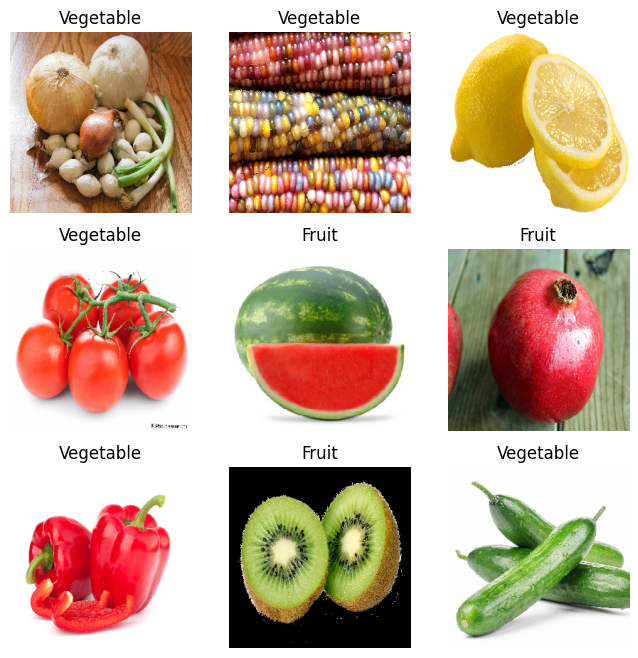

(32, 256, 256, 3)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 배치 데이터 가져오기
images, labels = next(train_generator)

# 이미지 시각화
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(images[i])
    axes[i].set_title("Fruit" if labels[i] == 0 else "Vegetable")
    axes[i].axis('off')

plt.show()
print(images.shape)

## 1. CNN(이진 분류)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CNN 모델 정의
def fruit_vegetable_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # 과적합 방지
        layers.Dense(1, activation='sigmoid')  # 이진 분류 (0: Fruit, 1: Vegetable)
    ])

    return model

# 모델 생성
model = fruit_vegetable_cnn()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 구조 확인
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
# 모델 학습
history = model.fit(
    train_generator,
    epochs,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 973ms/step - accuracy: 0.6716 - loss: 0.9564 - val_accuracy: 0.7315 - val_loss: 0.5905
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 898ms/step - accuracy: 0.7234 - loss: 0.5896 - val_accuracy: 0.7315 - val_loss: 0.5408
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 889ms/step - accuracy: 0.7313 - loss: 0.5296 - val_accuracy: 0.7283 - val_loss: 0.5478
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 71s 906ms/step - accuracy: 0.7371 - loss: 0.5243 - val_accuracy: 0.7572 - val_loss: 0.5247
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 898ms/step - accuracy: 0.7571 - loss: 0.4833 - val_accuracy: 0.7203 - val_loss: 0.5452
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 901ms/step - accuracy: 0.7605 - loss: 0.5000 - val_accuracy: 0.7379 - val_loss: 0.5704
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 905ms/step - accuracy: 0.7666 - loss: 0.4611 - val_accuracy: 0.7412 - val_loss: 0.5690
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 71s 908ms/step - accuracy: 0.8110 - loss: 0.4037 - val_accuracy: 0.731

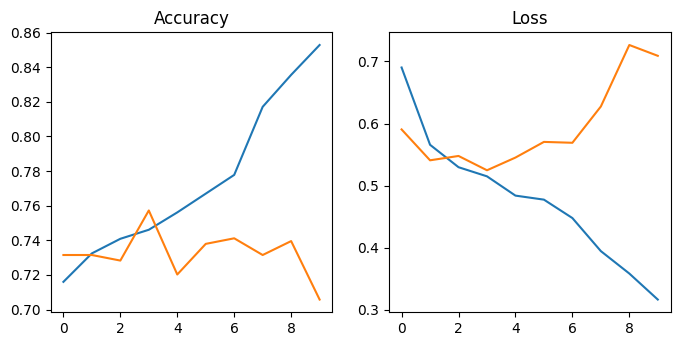

In [ ]:
epochs_range = range(10)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range , history.history['val_accuracy'],label ='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range , history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

plt.show()

In [ ]:
# 테스트 데이터 불러오기
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    "fruit_vegetable/test",  # 테스트 데이터 경로
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary",
    shuffle=False  # 순서를 유지해서 예측 결과 비교 가능
)

# 테스트 데이터에서 평가
test_loss, test_acc = model.evaluate(test_generator)

print(f"✅ 테스트 데이터 정확도: {test_acc * 100:.2f}%")
print(f"✅ 테스트 데이터 손실 값: {test_loss:.4f}")

Found 359 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 958ms/step - accuracy: 0.8258 - loss: 0.4529
✅ 테스트 데이터 정확도: 88.86%
✅ 테스트 데이터 손실 값: 0.2973


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 886ms/step


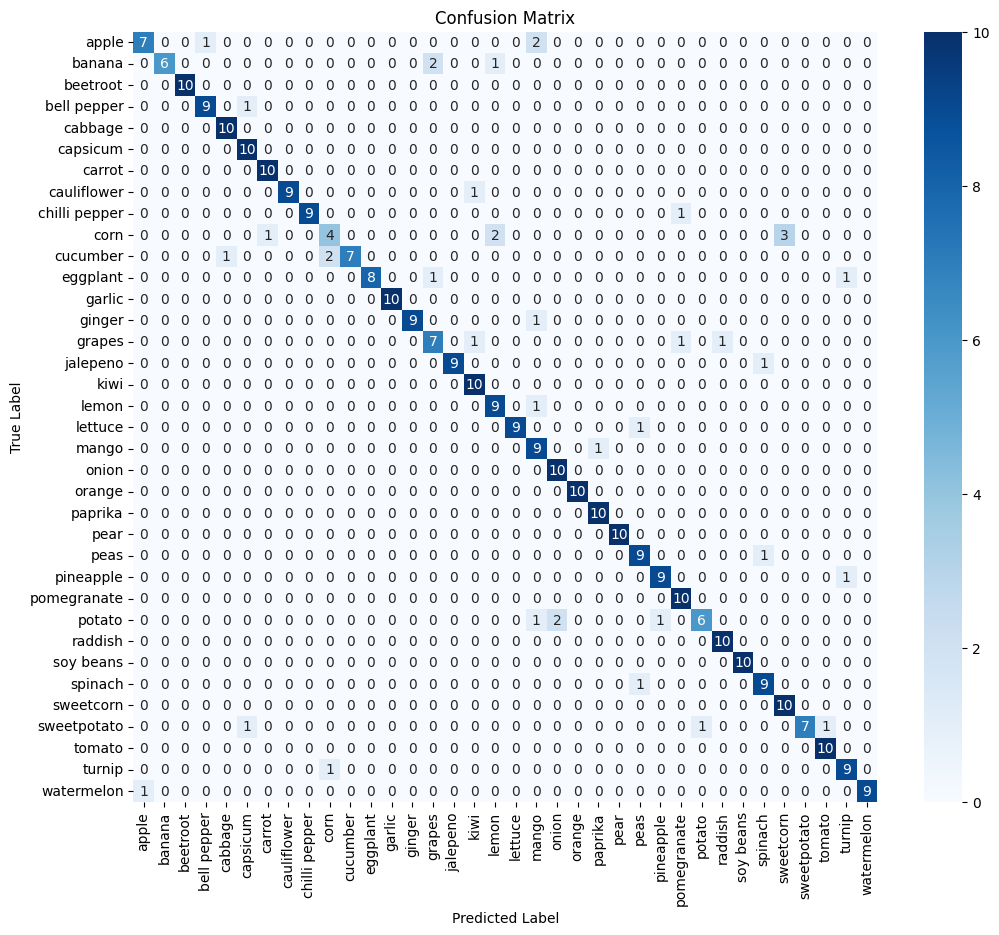

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 예측값 가져오기
y_true = test_generator.classes  # 실제 라벨
y_pred_prob = model.predict(test_generator)  # 예측 확률값
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # 0.5 기준으로 이진 분류

# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred)

# 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fruit', 'Vegetable'], yticklabels=['Fruit', 'Vegetable'])

# 그래프 설정
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

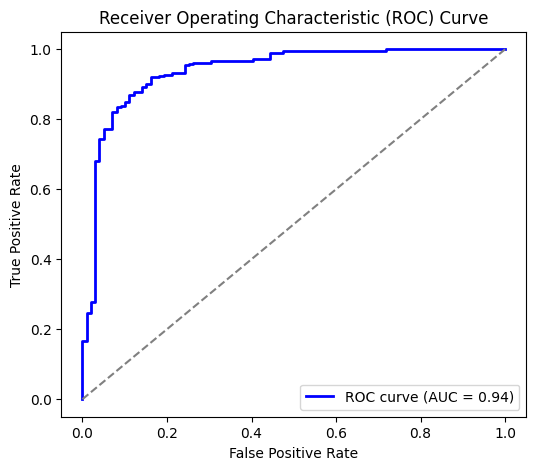

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 시각화
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 다중 분류

## 데이터 로딩

In [2]:
# 1. Kaggle API 키 업로드 및 설정
from google.colab import files
files.upload()  # kaggle.json 업로드

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 2. Google Drive 마운트 및 프로젝트 폴더 생성
from google.colab import drive
import os

drive.mount('/content/drive')

# 프로젝트 폴더 설정
project_dir = "" #"/content/drive/MyDrive/KTB_personal_project"
dataset_dir = os.path.join(project_dir, "fruit_vegetable")
os.makedirs(dataset_dir, exist_ok=True)

# 3. 데이터셋 다운로드 (압축 파일은 일단 /content 에 다운로드)
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition -p /content

# 4. 압축 해제 후 프로젝트 폴더로 이동
!unzip -q /content/fruit-and-vegetable-image-recognition.zip -d "{dataset_dir}"

print(f"✅ 데이터셋이 다음 경로에 준비되었습니다: {dataset_dir}")

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
✅ 데이터셋이 다음 경로에 준비되었습니다: fruit_vegetable


In [3]:
import os
import shutil
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#drive.mount('/content/drive')

# 기존 데이터 경로
base_dir = "fruit_vegetable/train"
test_dir = "fruit_vegetable/test"
val_dir = "fruit_vegetable/validation"


# 데이터 증강 및 전처리
datagen = ImageDataGenerator(
    rescale=1.0/255,  # 정규화
)

# 학습 데이터 불러오기
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),  # 이미지 크기 조정
    batch_size=32,
    class_mode="categorical",  # 이진 분류 (fruit=0, vegetable=1)
)

# 검증 데이터 불러오기
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
)

# 테스트 데이터 불러오기
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # 테스트 데이터 경로
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # 순서를 유지해서 예측 결과 비교 가능
)

print(train_generator.class_indices)  # 클래스별 인덱스 확인
print(train_generator.num_classes)  # 총 클래스 개수 확인
print(train_generator.batch_size)  # 배치 크기 확인

print(test_generator.class_indices)  # 클래스별 인덱스 확인
print(test_generator.num_classes)  # 총 클래스 개수 확인
print(test_generator.batch_size)  # 배치 크기 확인

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}
36
32
{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika'

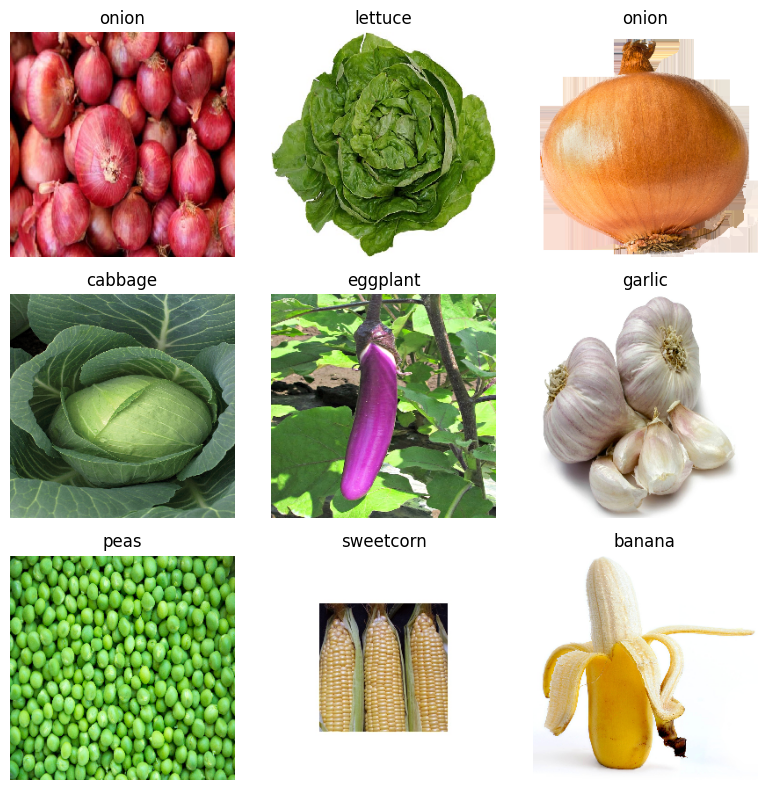

(32, 256, 256, 3)


In [4]:
# 클래스 인덱스를 이름으로 매핑하는 딕셔너리 생성
class_indices = train_generator.class_indices  # {'fruit': 0, 'vegetable': 1}
# 인덱스를 이름으로 바꾸기 위해 반전
idx_to_class = {v: k for k, v in class_indices.items()}

# 배치 데이터 가져오기
images, labels = next(train_generator)

# 이미지 시각화
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(images[i])
    # 원-핫 인코딩 벡터를 정수 인덱스로 변환
    class_index = np.argmax(labels[i])
    class_name = idx_to_class[class_index]
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print(images.shape)

## 학습을 위한 함수, 라이브러리 임포트

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, backend
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

from tensorflow.keras.applications import VGG16, ResNet50

### DB 사용을 위한 세팅

In [5]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 66.5 MB/s eta 0:00:00


In [6]:
from google.colab import files
uploaded = files.upload()  # 여기서 ca.pem 업로드

Saving ca.pem to ca.pem


In [ ]:
import mysql.connector

db_config = {
    'host': 'ktb-jensen-chanhue.h.aivencloud.com',
    'user': 'avnadmin',
    'password': '************',
    'database': 'defaultdb',
    'port': 21870,
    'ssl_ca': '/content/ca.pem'
}



conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS training_logs (
    id INT AUTO_INCREMENT PRIMARY KEY,
    model_name VARCHAR(100) NOT NULL,
    epoch INT NOT NULL,
    start_time DATETIME NOT NULL,
    end_time DATETIME NOT NULL,
    train_accuracy FLOAT,
    val_accuracy FLOAT,
    train_loss FLOAT,
    val_loss FLOAT
);
"""

cursor.execute(create_table_query)
conn.commit()
cursor.close()
conn.close()

print("✅ training_logs 테이블 생성 완료")

✅ training_logs 테이블 생성 완료


In [8]:
import mysql.connector
from datetime import datetime
import tensorflow as tf

class MySQLLogger(tf.keras.callbacks.Callback):
    def __init__(self, model_name, db_config):
        super().__init__()
        self.model_name = model_name
        self.db_config = db_config

    def on_train_begin(self, logs=None):
        self.conn = mysql.connector.connect(**self.db_config)
        self.cursor = self.conn.cursor()

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = datetime.now()

    def on_epoch_end(self, epoch, logs=None):
        epoch_end_time = datetime.now()

        # 로그에서 값 가져오기
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        train_loss = logs.get('loss')
        val_loss = logs.get('val_loss')

        query = """
            INSERT INTO training_logs (
                model_name, epoch, start_time, end_time,
                train_accuracy, val_accuracy, train_loss, val_loss
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        """
        values = (
            self.model_name,
            epoch + 1,
            self.epoch_start_time,
            epoch_end_time,
            float(train_acc) if train_acc is not None else None,
            float(val_acc) if val_acc is not None else None,
            float(train_loss) if train_loss is not None else None,
            float(val_loss) if val_loss is not None else None
        )

        self.cursor.execute(query, values)
        self.conn.commit()

    def on_train_end(self, logs=None):
        self.cursor.close()
        self.conn.close()

### 학습함수

In [9]:
def train_model(model, model_name, optimizer, train_data, val_data, metrics=['accuracy'], loss_fn='categorical_crossentropy', epochs=25, verbose=1):
    # 저장 경로 설정
    checkpoint_path = f'/content/drive/MyDrive/KTB_personal_project/{model_name}.keras'
    log_dir = f'/content/drive/MyDrive/KTB_personal_project/logs/{model_name}'

    # DB 설정
    db_config = {
        'host': 'ktb-jensen-chanhue.h.aivencloud.com',
        'port': 21870,
        'user': 'avnadmin',
        'password': 'AVNS_KptliEWmHo9_Mpqw1xs',
        'database': 'defaultdb',
        'ssl_ca': '/content/ca.pem'  # ← 여기가 핵심!
    }



    # 콜백 설정
    checkpoint_cb = ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)
    mysql_cb = MySQLLogger(model_name, db_config)

    # 모델 컴파일 & 학습
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=metrics
    )

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        verbose=verbose,
        callbacks=[checkpoint_cb, tensorboard_cb, mysql_cb]
    )

    return model, history


# Channel Attention (SE Block) 정의
def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]  # 채널 수 가져오기

    # Global Average Pooling (채널별 평균값 계산)
    avg_pool = layers.GlobalAveragePooling2D()(input_feature)
    avg_pool = layers.Reshape((1, 1, channel))(avg_pool)

    # 두 개의 Fully Connected Layer (MLP)
    dense_1 = layers.Dense(channel // ratio, activation='relu')(avg_pool)  # 축소
    dense_2 = layers.Dense(channel, activation='sigmoid')(dense_1)  # 복원 (Sigmoid로 가중치 계산)

    # 원래 Feature Map에 가중치 적용
    return layers.Multiply()([input_feature, dense_2])

## 모델 선언

### CNN

In [10]:
# CNN 모델 정의
def cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # 과적합 방지
        layers.Dense(36, activation='softmax')
    ])

    return model

### CNN + attention

In [11]:
# CNN 모델 정의 (Channel Attention 추가)
def cnn_with_attention():
    inputs = layers.Input(shape=(256, 256, 3))

    # Conv Block 1
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # Conv Block 2
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Conv Block 3
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = channel_attention(x)  # Channel Attention 추가

    # Fully Connected Layer
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(36, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

### VGG

In [12]:
def vgg16_model(input_shape=(256, 256, 3), num_classes=36, dropout_rate=0.5, train_base=True):
    # 사전학습된 VGG16 모델 (fully connected 층 제외)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # 사전학습된 층 학습 여부 설정
    base_model.trainable = train_base

    # 커스터마이징 분류기 추가
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # 전체 모델 구성
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

### ResNet

In [13]:
def resnet50_model(input_shape=(256, 256, 3), num_classes=36, dropout_rate=0.5, train_base=True):
    # 사전학습된 ResNet50 모델 (fully connected 층 제외)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 사전학습된 층 학습 여부 설정
    base_model.trainable = train_base

    # 커스터마이징 분류기 추가
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # 전체 모델 구성
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

### VGG + attention

In [10]:
def vgg16_attention_model(input_shape=(256, 256, 3), num_classes=36, dropout_rate=0.5, train_base=True):
    # 사전학습된 VGG16 모델 (fully connected 층 제외)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # 사전학습된 층 학습 여부 설정
    base_model.trainable = train_base

    # 커스터마이징 분류기 추가
    x = base_model.output
    x = channel_attention(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # 전체 모델 구성
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

### Res + attention

In [11]:
def res_attention_model(input_shape=(256, 256, 3), num_classes=36, dropout_rate=0.5, train_base=True):
    # 사전학습된 VGG16 모델 (fully connected 층 제외)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 사전학습된 층 학습 여부 설정
    base_model.trainable = train_base

    # 커스터마이징 분류기 추가
    x = base_model.output
    x = channel_attention(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # 전체 모델 구성
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

## 시각화 함수

In [12]:
def visualize_model_performance(history, model, test_generator):
    """
    모델 학습 결과와 테스트 평가 및 혼동 행렬을 시각화하는 함수

    Parameters:
        history: model.fit() 결과 객체
        model: 학습된 모델 객체
        test_generator: 테스트 데이터 제너레이터
    """
    # 1. Accuracy & Loss 시각화
    epochs_range = range(len(history.history['accuracy']))

    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 2. 테스트 데이터에서 평가
    test_loss, test_acc = model.evaluate(test_generator, verbose=0)
    print(f"\n✅ 테스트 데이터 정확도: {test_acc * 100:.2f}%")
    print(f"✅ 테스트 데이터 손실 값: {test_loss:.4f}")

    # 3. 혼동 행렬 시각화
    y_true = test_generator.classes
    y_pred_prob = model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    class_labels = list(test_generator.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## 모델 학습 진행

In [41]:
cnn_model, cnn_his = train_model(cnn(), 'cnn', 'adam', train_generator, val_generator)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.0245 - loss: 4.1012
Epoch 1: val_accuracy improved from -inf to 0.02564, saving model to /content/drive/MyDrive/KTB_personal_project/cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 869ms/step - accuracy: 0.0245 - loss: 4.0972 - val_accuracy: 0.0256 - val_loss: 3.5331
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.0539 - loss: 3.5171
Epoch 2: val_accuracy improved from 0.02564 to 0.12821, saving model to /content/drive/MyDrive/KTB_personal_project/cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 855ms/step - accuracy: 0.0539 - loss: 3.5168 - val_accuracy: 0.1282 - val_loss: 3.2345
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.0840 - loss: 3.3124
Epoch 3: val_accuracy improved from 0.12821 to 0.24217, saving model to /content/drive/MyDrive/KTB_personal_project/cnn.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 845ms/step - accuracy: 0.0840 - loss: 3.3120 - val_accuracy: 0.2422 - val_loss: 2.9156
Epoch 4/25
98

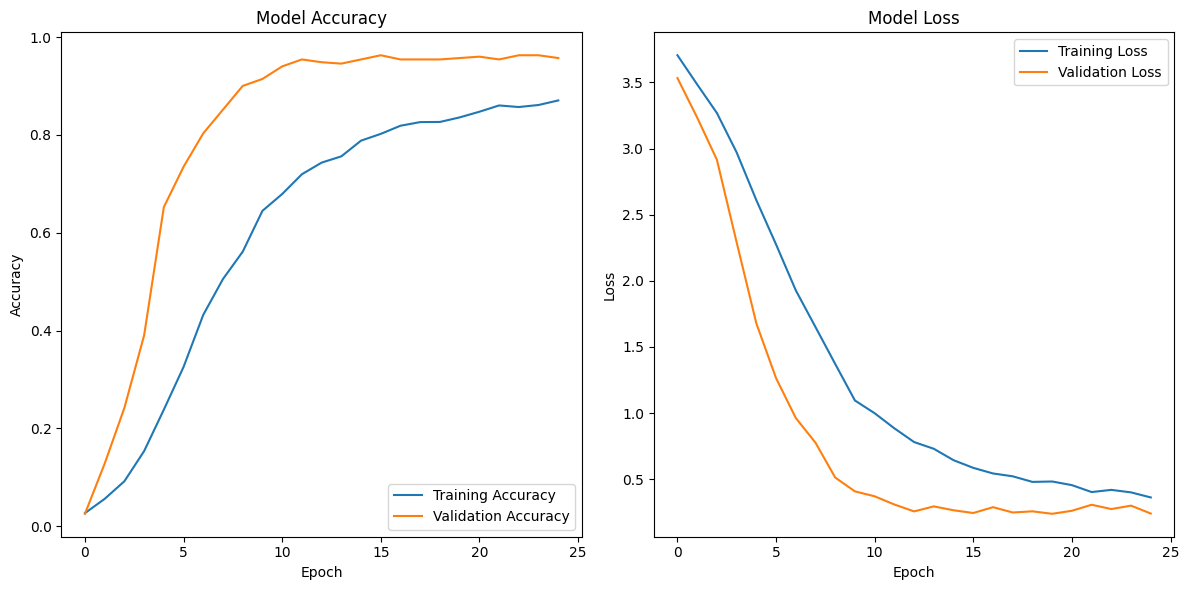


✅ 테스트 데이터 정확도: 95.82%
✅ 테스트 데이터 손실 값: 0.2348
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 908ms/step


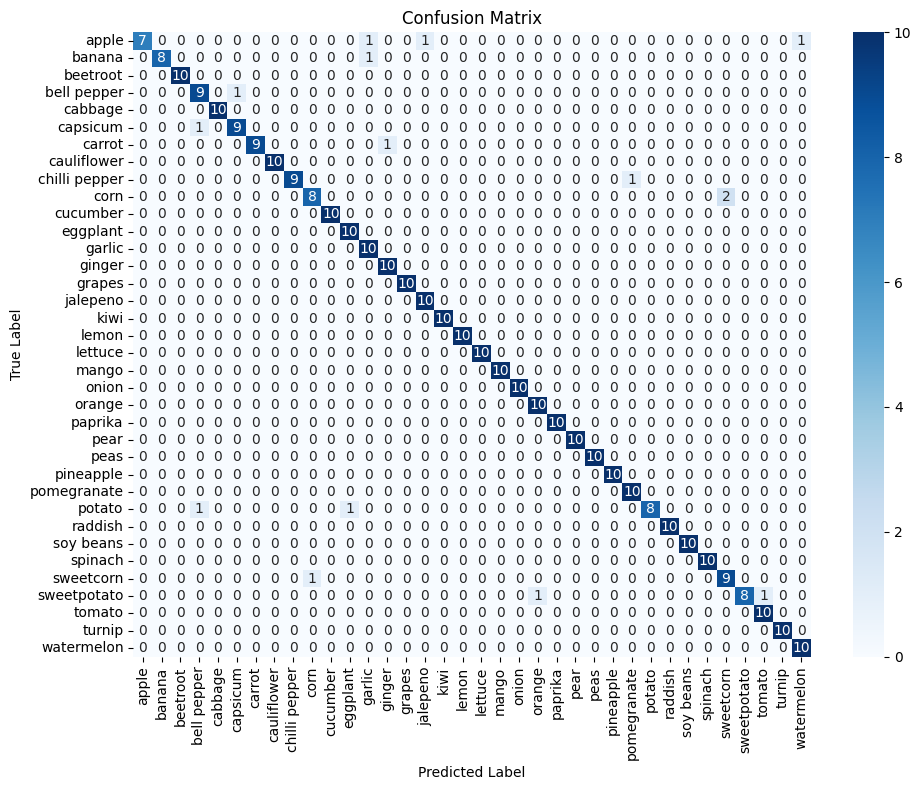

In [42]:
visualize_model_performance(cnn_his, cnn_model, test_generator)

In [17]:
cnn_att_model, cnn_att_his = train_model(cnn_with_attention(), 'cnn_with_attention', Adam(learning_rate=0.0001), train_generator, val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.0372 - loss: 3.5971
Epoch 1: val_accuracy improved from -inf to 0.04558, saving model to /content/drive/MyDrive/KTB_personal_project/cnn_with_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 103s 963ms/step - accuracy: 0.0372 - loss: 3.5968 - val_accuracy: 0.0456 - val_loss: 3.4806
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.0647 - loss: 3.4752
Epoch 2: val_accuracy improved from 0.04558 to 0.14815, saving model to /content/drive/MyDrive/KTB_personal_project/cnn_with_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 830ms/step - accuracy: 0.0648 - loss: 3.4750 - val_accuracy: 0.1481 - val_loss: 3.2764
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.0945 - loss: 3.3522
Epoch 3: val_accuracy improved from 0.14815 to 0.23077, saving model to /content/drive/MyDrive/KTB_personal_project/cnn_with_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 837ms/step - accuracy: 0.0945 - loss: 3.3519 - val_acc

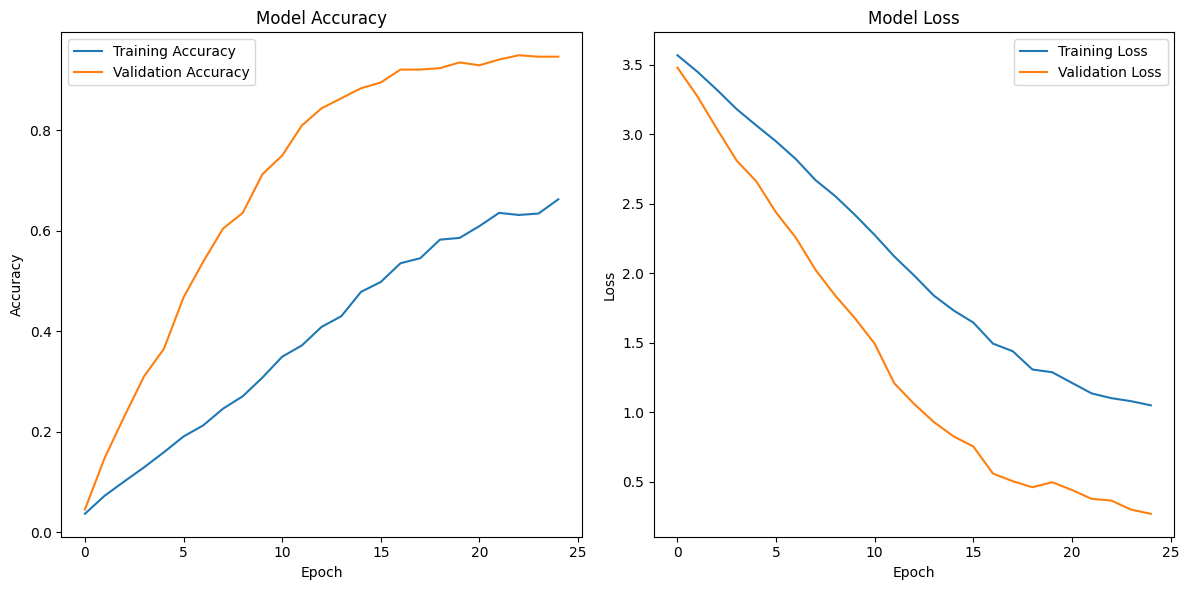


✅ 테스트 데이터 정확도: 94.71%
✅ 테스트 데이터 손실 값: 0.2671
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 868ms/step


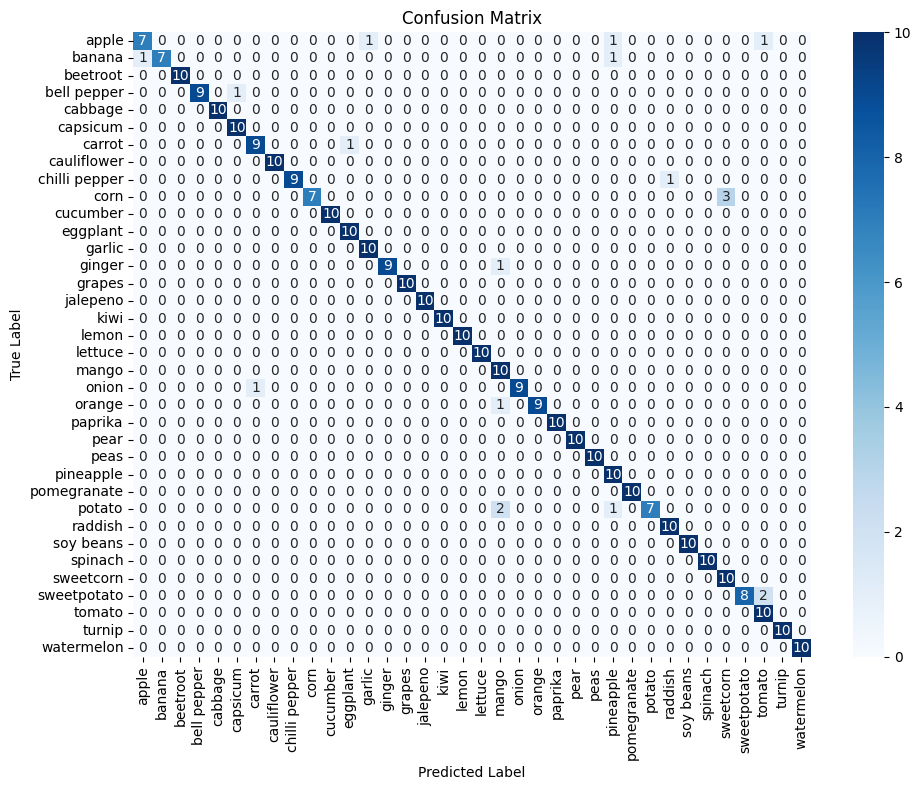

In [18]:
visualize_model_performance(cnn_att_his, cnn_att_model, test_generator)

In [19]:
vgg_model, vgg_his = train_model(vgg16_model(), 'vgg16', Adam(learning_rate=0.00001), train_generator, val_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
15/98 ━━━━━━━━━━━━━━━━━━━━ 58s 704ms/step - accuracy: 0.0326 - loss: 3.7729

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.0396 - loss: 3.7050
Epoch 1: val_accuracy improved from -inf to 0.29630, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.0398 - loss: 3.7038 - val_accuracy: 0.2963 - val_loss: 3.0293
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.1759 - loss: 3.0916
Epoch 2: val_accuracy improved from 0.29630 to 0.56410, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 848ms/step - accuracy: 0.1763 - loss: 3.0901 - val_accuracy: 0.5641 - val_loss: 2.0734
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.3260 - loss: 2.4858
Epoch 3: val_accuracy improved from 0.56410 to 0.72934, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 839ms/step - accuracy: 0.3263 - loss: 2.4849 - val_accuracy: 0.7293 - val_loss: 1.4159
Epoch 4/25
98/98 ━━━

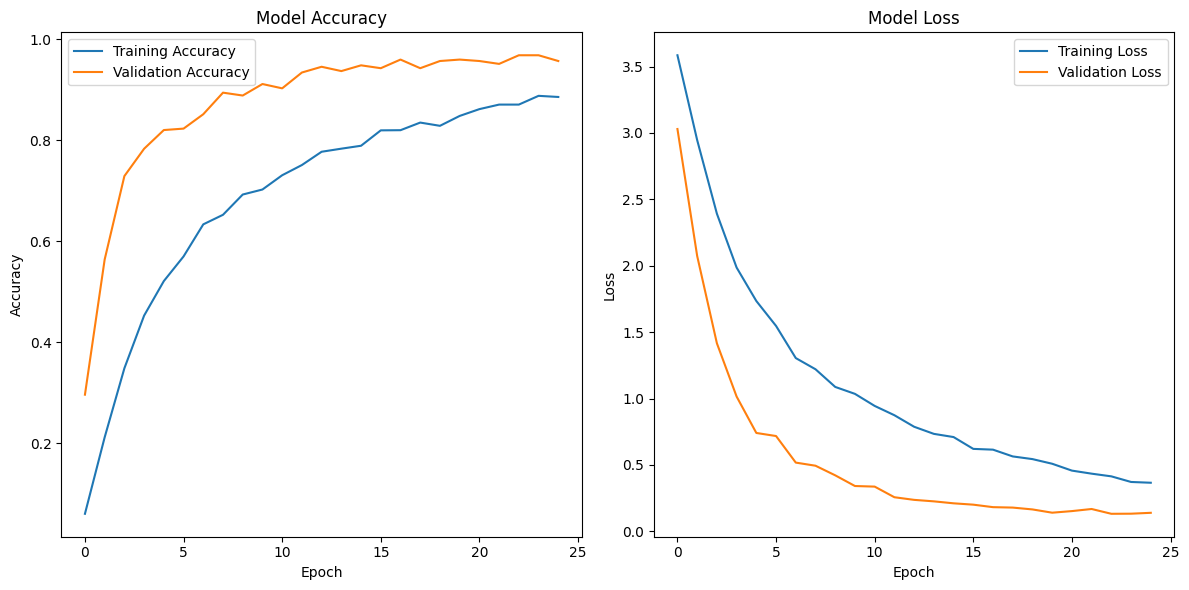


✅ 테스트 데이터 정확도: 95.82%
✅ 테스트 데이터 손실 값: 0.1388
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 892ms/step


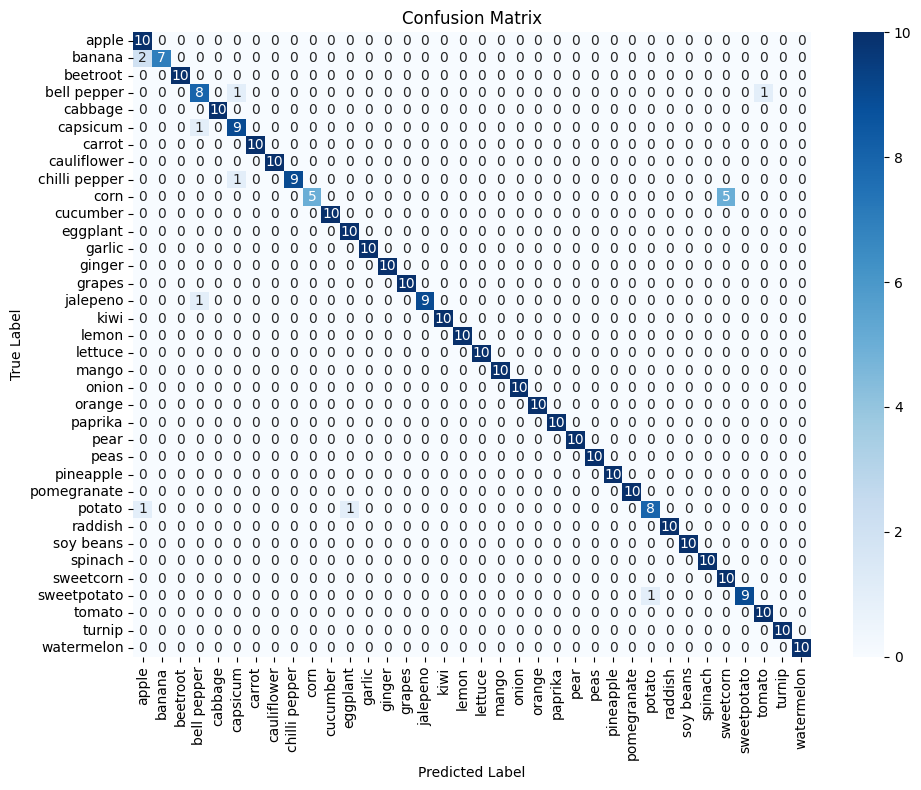

In [20]:
visualize_model_performance(vgg_his, vgg_model, test_generator)

In [21]:
res_model, res_his = train_model(resnet50_model(), 'resnet50', Adam(learning_rate=0.00001), train_generator, val_generator)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.0364 - loss: 4.2209
Epoch 1: val_accuracy improved from -inf to 0.03134, saving model to /content/drive/MyDrive/KTB_personal_project/resnet50.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.0366 - loss: 4.2182 - val_accuracy: 0.0313 - val_loss: 3.9348
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.1570 - loss: 3.1980
Epoch 2: val_accuracy improved from 0.03134 to 0.04274, saving model to /content/drive/MyDrive/KTB_personal_project/resnet50.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 888ms/step - accuracy: 0.1574 - loss: 3.1963 - val_accuracy: 0.0427 - val_loss: 3.9342
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.3440 - loss: 2.5308
Epoch 3: val_accuracy improved from 0.04274 to 0.04843, saving model to /content/drive/MyDrive/KTB_personal_project/resnet50.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 889ms/step - accuracy: 0.3443 - loss: 2.5294 - val_accuracy: 0.0484 - val_loss: 3.8304


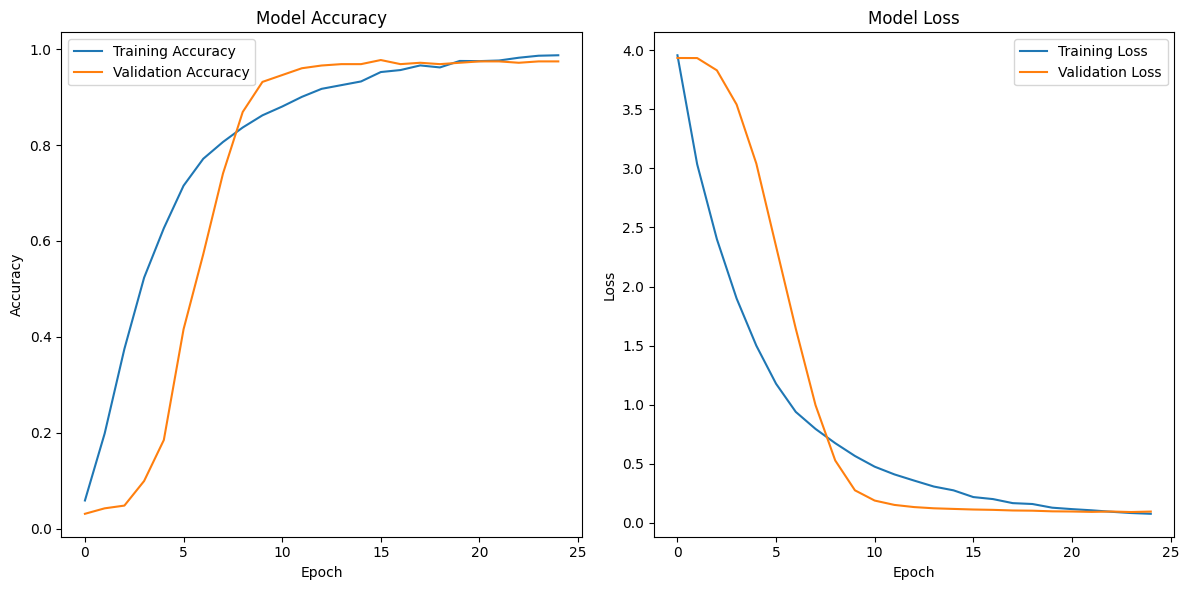


✅ 테스트 데이터 정확도: 97.49%
✅ 테스트 데이터 손실 값: 0.0924
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


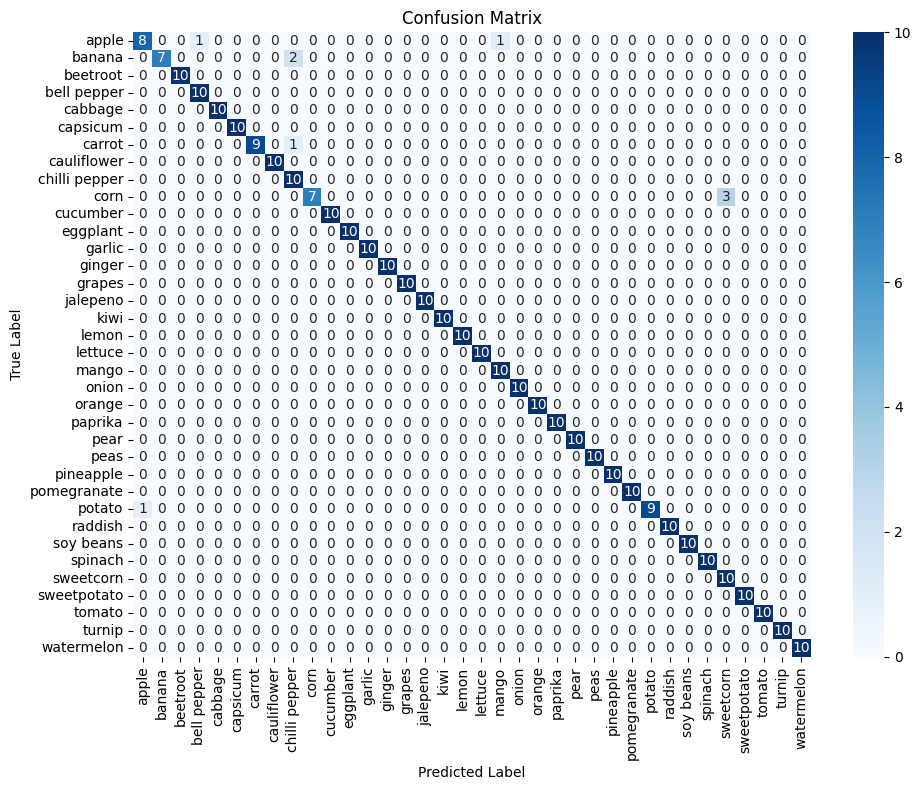

In [22]:
visualize_model_performance(res_his, res_model, test_generator)

In [13]:
vgg16_att_model, vgg16_att_his = train_model(vgg16_attention_model(), 'vgg16_attention', Adam(learning_rate=0.00001), train_generator, val_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
17/98 ━━━━━━━━━━━━━━━━━━━━ 1:54 1s/step - accuracy: 0.0205 - loss: 3.6737

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.0245 - loss: 3.6437
Epoch 1: val_accuracy improved from -inf to 0.07123, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.0245 - loss: 3.6434 - val_accuracy: 0.0712 - val_loss: 3.5337
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.0553 - loss: 3.5161
Epoch 2: val_accuracy improved from 0.07123 to 0.26496, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 846ms/step - accuracy: 0.0556 - loss: 3.5153 - val_accuracy: 0.2650 - val_loss: 3.0082
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.1717 - loss: 3.1201
Epoch 3: val_accuracy improved from 0.26496 to 0.43020, saving model to /content/drive/MyDrive/KTB_personal_project/vgg16_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 837ms/step - accuracy: 0.1719 - loss: 3.1194 - val_accuracy: 0.4302 - val_los

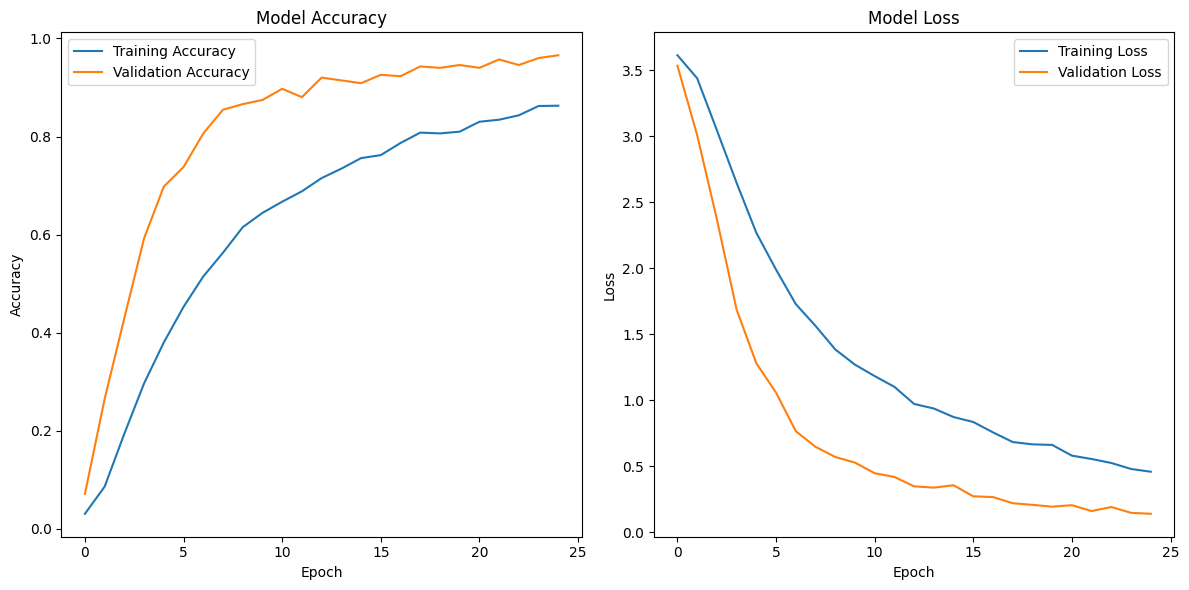


✅ 테스트 데이터 정확도: 96.66%
✅ 테스트 데이터 손실 값: 0.1396
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 902ms/step


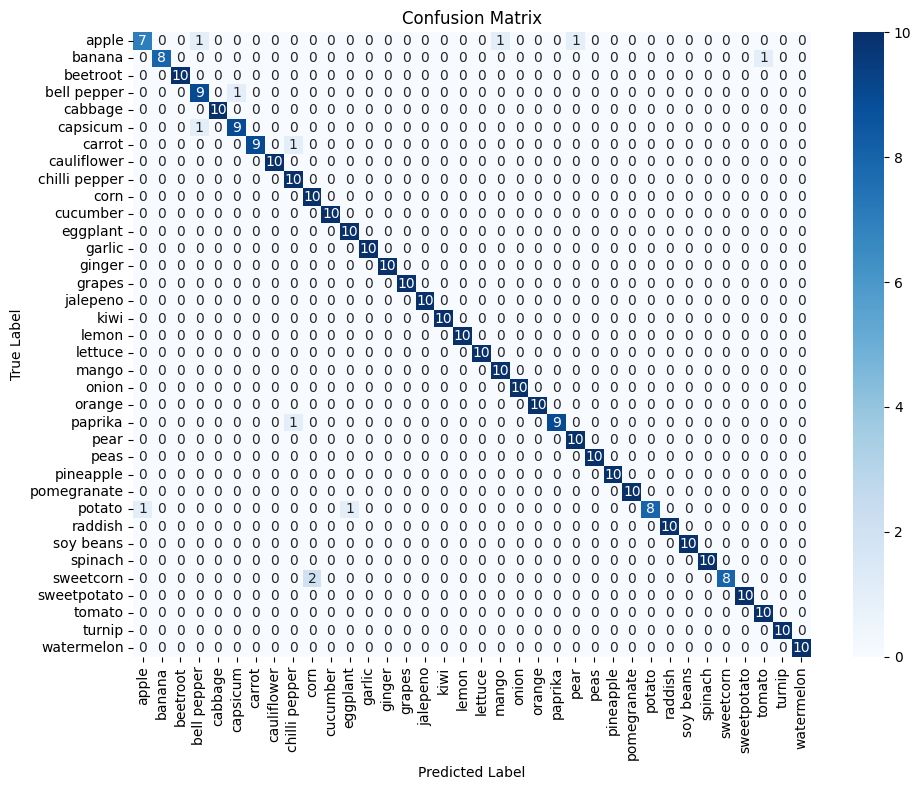

In [14]:
visualize_model_performance(vgg16_att_his, vgg16_att_model, test_generator)

In [25]:
res_att_model, res_attention_his = train_model(res_attention_model(), 'res_attention', Adam(learning_rate=0.0001), train_generator, val_generator)

Epoch 1/25
11/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 742ms/step - accuracy: 0.0472 - loss: 3.6445

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.2455 - loss: 2.9644
Epoch 1: val_accuracy improved from -inf to 0.00285, saving model to /content/drive/MyDrive/KTB_personal_project/res_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.2475 - loss: 2.9569 - val_accuracy: 0.0028 - val_loss: 3.6194
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.7807 - loss: 0.7999
Epoch 2: val_accuracy improved from 0.00285 to 0.00855, saving model to /content/drive/MyDrive/KTB_personal_project/res_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 896ms/step - accuracy: 0.7807 - loss: 0.7997 - val_accuracy: 0.0085 - val_loss: 3.6400
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.8812 - loss: 0.4172
Epoch 3: val_accuracy improved from 0.00855 to 0.02564, saving model to /content/drive/MyDrive/KTB_personal_project/res_attention.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 898ms/step - accuracy: 0.8811 - loss: 0.4175 - val_accuracy: 0.0256 - val_loss: 3.6

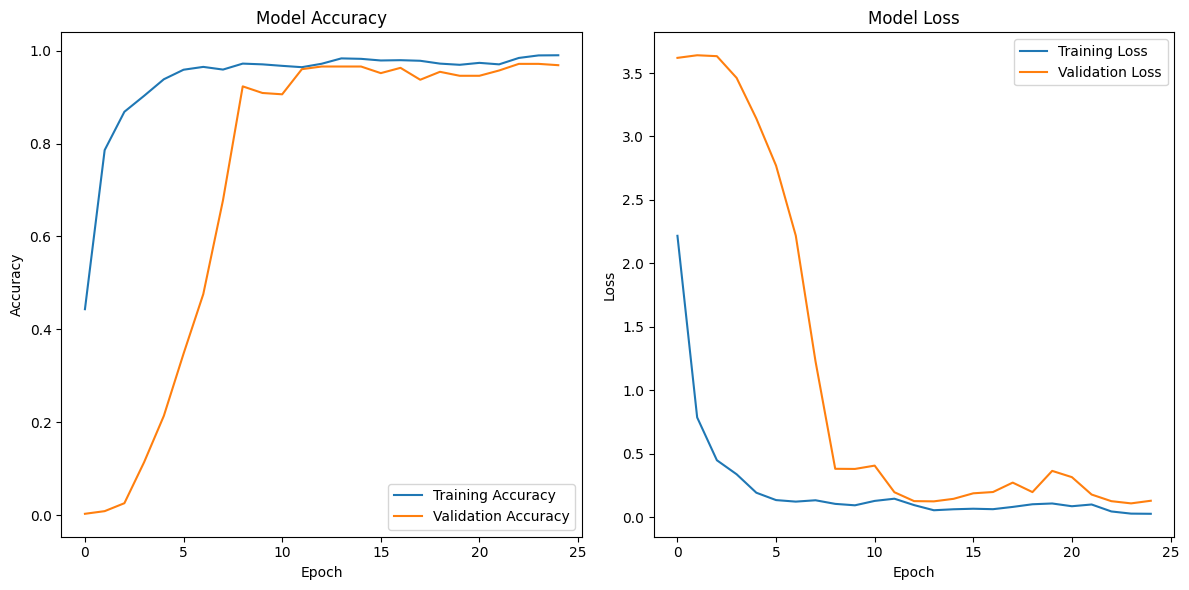


✅ 테스트 데이터 정확도: 96.94%
✅ 테스트 데이터 손실 값: 0.1261
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


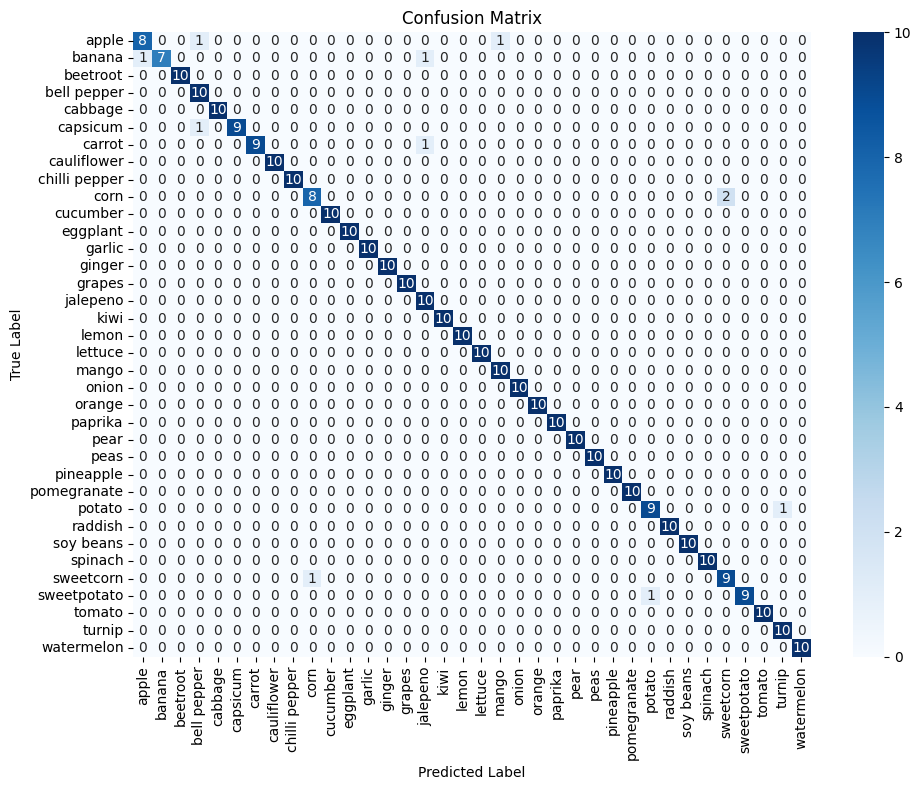

In [26]:
visualize_model_performance(res_attention_his, res_att_model, test_generator)


In [5]:
import mysql.connector
import pandas as pd

# Aiven 연결 정보 (이전과 동일)
db_config = {
    'host': 'ktb-jensen-chanhue.h.aivencloud.com',
    'port': 21870,
    'user': 'avnadmin',
    'password': 'AVNS_KptliEWmHo9_Mpqw1xs',
    'database': 'defaultdb',
    'ssl_ca': '/content/ca.pem'
}

# 출력할 테이블 이름
table_name = "training_logs"  # ← 여기에 원하는 테이블명 넣으면 됨

# 연결 후 데이터 읽기
conn = mysql.connector.connect(**db_config)
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, conn)
conn.close()

# 출력
print("✅ 테이블 내용:")
print(df)

<ipython-input-5-98459534b7e3>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ 테이블 내용:
      id     model_name  epoch          start_time            end_time  \
0      1            cnn      1 2025-03-29 11:35:08 2025-03-29 11:36:39   
1      2            cnn      2 2025-03-29 11:36:40 2025-03-29 11:38:04   
2      3            cnn      3 2025-03-29 11:38:04 2025-03-29 11:39:28   
3      4            cnn      4 2025-03-29 11:39:28 2025-03-29 11:40:50   
4      5            cnn      5 2025-03-29 11:40:51 2025-03-29 11:42:12   
..   ...            ...    ...                 ...                 ...   
151  152  res_attention     21 2025-03-29 19:24:58 2025-03-29 19:26:23   
152  153  res_attention     22 2025-03-29 19:26:23 2025-03-29 19:27:47   
153  154  res_attention     23 2025-03-29 19:27:48 2025-03-29 19:29:15   
154  155  res_attention     24 2025-03-29 19:29:16 2025-03-29 19:30:40   
155  156  res_attention     25 2025-03-29 19:30:41 2025-03-29 19:32:04   

     train_accuracy  val_accuracy  train_loss  val_loss  
0          0.054896      0.094017    3.5554